# Predict Heart Disease Using Key Risk Factors

Project by: Christopher Garcia

Date: 4/20/2022

Objective: 

According to the CDC, almost half of all Americans (47%) have at least 1 of 3 key indicators for heart disease: high blood pressure, high cholesterol, and smoking. In this data mining project, we are going to predict heart disease using some of the different aspects of a persons health. 

In [111]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries and modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder



In [2]:
# load and inspect data
heart_df = pd.read_csv('~/Downloads/heart_2020.csv')
heart_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
heart_df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

### [Exploratory Data Analysis]


In [5]:
heart_df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


What do our summary statistics tell us about the distributions? Outlier? same values, large values

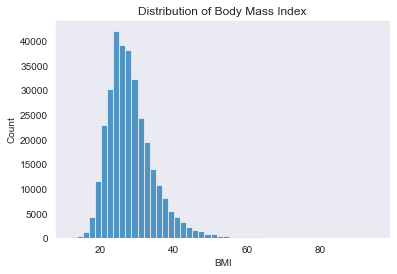

In [6]:
sns.set_style('dark')
sns.histplot(data = heart_df, x = 'BMI', bins = 50)
plt.title('Distribution of Body Mass Index')
plt.show()

Describe what BMI is and what is measures. How important it can be in this analysis. 

What do we see here with BMI

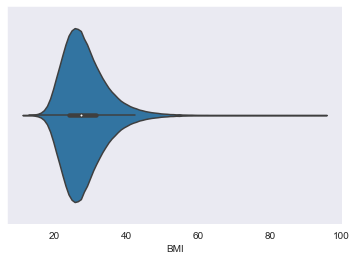

In [7]:
sns.set_style('dark')
sns.violinplot(data = heart_df, x = 'BMI')
plt.show()

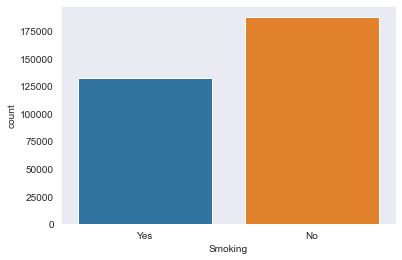

In [8]:
sns.countplot(data = heart_df, x = 'Smoking')
plt.show()

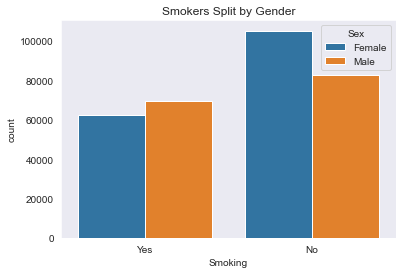

In [9]:
sns.countplot(data = heart_df, x = 'Smoking', hue = 'Sex')
plt.title('Smokers Split by Gender')
plt.show()

In [10]:
# contingency table to check 
# proportions of f and 
# who smoke
freq_smoker_genders = pd.crosstab(heart_df['Smoking'], heart_df['Sex'], margins=True)
freq_smoker_genders

Sex,Female,Male,All
Smoking,,,
No,105276,82611,187887
Yes,62529,69379,131908
All,167805,151990,319795


In [11]:
# in percentages
prop_table_per = freq_smoker_genders/len(heart_df)
round(prop_table_per, 2)

Sex,Female,Male,All
Smoking,,,
No,0.33,0.26,0.59
Yes,0.20,0.22,0.41
All,0.52,0.48,1.00


Talk about the proportions table

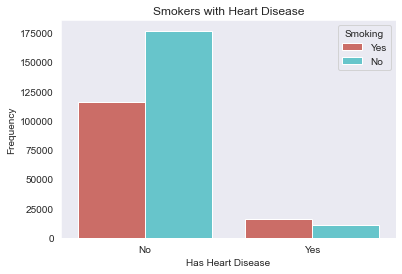

In [12]:
# lets check smokers that have heart disease
# use for paper
sns.countplot(data = heart_df, x = 'HeartDisease', hue = 'Smoking', palette='hls')
plt.title('Smokers with Heart Disease')
plt.xlabel('Has Heart Disease')
plt.ylabel('Frequency')
plt.show()

In [13]:
# contingency table
# heart disease vs smoker
freq_smok_hd = pd.crosstab(heart_df['Smoking'], heart_df['HeartDisease'], margins=True)
prop_table_hd = freq_smok_hd/len(heart_df)
round(prop_table_hd, 2)


HeartDisease,No,Yes,All
Smoking,,,
No,0.55,0.04,0.59
Yes,0.36,0.05,0.41
All,0.91,0.09,1.00


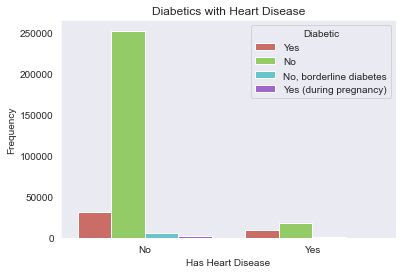

In [14]:
# HD with high blood pressure
# use on paper?
sns.countplot(data = heart_df, x = 'HeartDisease', hue = 'Diabetic', palette='hls')
plt.title('Diabetics with Heart Disease')
plt.xlabel('Has Heart Disease')
plt.ylabel('Frequency')
plt.show()

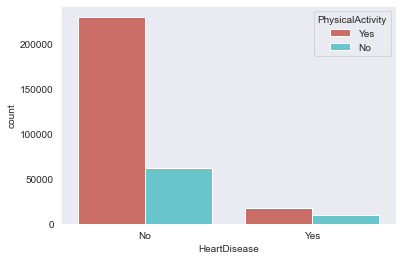

In [15]:
# physical activity
sns.countplot(data = heart_df, x = 'HeartDisease', hue = 'PhysicalActivity', palette='hls')
plt.show()

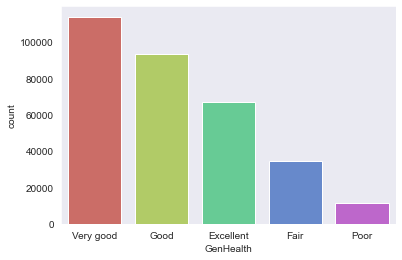

In [16]:
sns.countplot(data = heart_df, x = 'GenHealth', palette='hls', order = ['Very good', 'Good', 'Excellent', 'Fair', 'Poor'])
plt.show()

In [17]:
heart_df['GenHealth'].value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

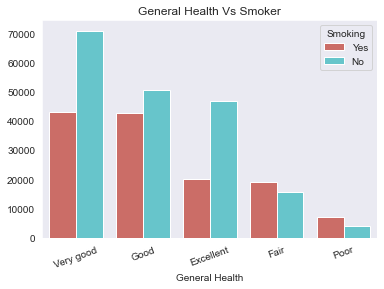

In [18]:
# use for paper
sns.countplot(data = heart_df, x = 'GenHealth', palette='hls', order = ['Very good', 'Good', 'Excellent', 'Fair', 'Poor'], hue = 'Smoking')
plt.title('General Health Vs Smoker')
plt.xticks(rotation=20)
plt.xlabel('General Health')
plt.ylabel(None)
plt.show()

In [19]:
# contingency table for 
# genhealth vs smoker
freq_genhealth = pd.crosstab(heart_df['Smoking'], heart_df['GenHealth'], margins=True)
prop_table_gh = freq_genhealth/len(heart_df)
round(prop_table_gh, 2)


GenHealth,Excellent,Fair,Good,Poor,Very good,All
Smoking,,,,,,
No,0.15,0.05,0.16,0.01,0.22,0.59
Yes,0.06,0.06,0.13,0.02,0.13,0.41
All,0.21,0.11,0.29,0.04,0.36,1.00


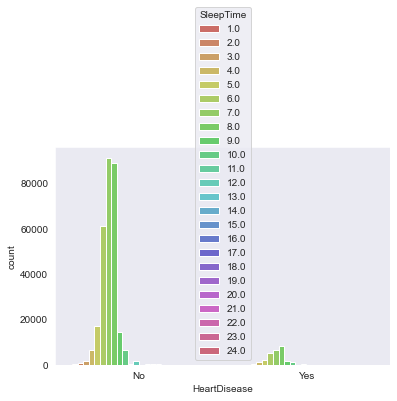

In [20]:
# physical activity
sns.countplot(data = heart_df, x = 'HeartDisease', hue = 'SleepTime', palette='hls')
plt.show()

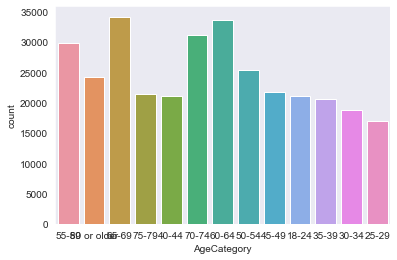

In [21]:
sns.countplot(data = heart_df, x = 'AgeCategory')
plt.show()

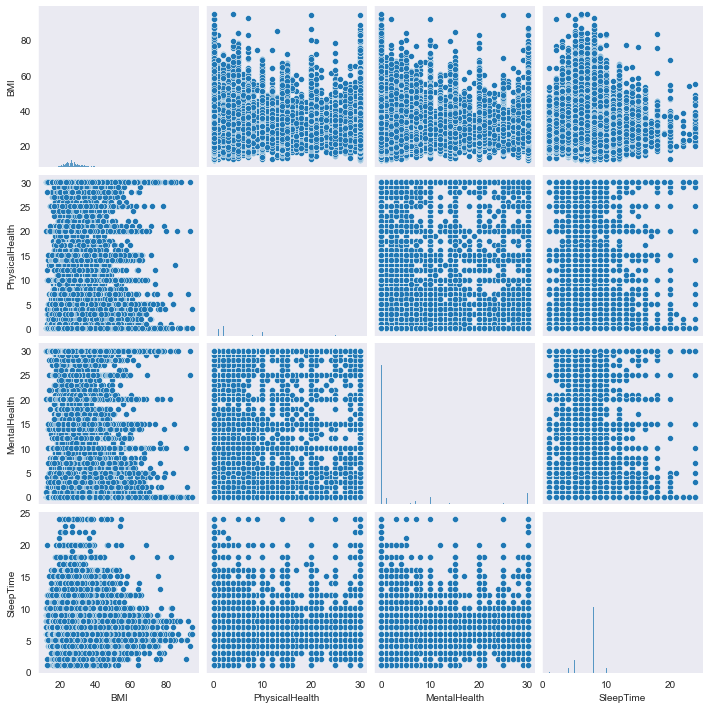

In [22]:
# pairplots
sns.pairplot(heart_df)
plt.show()

### [Baseline Model]

Now, we are going to build a logistic regression model using only numerical values.

In [28]:
# ML model building
# logisitic regression
heart_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [89]:
target_name = 'HeartDisease'
target = heart_df[target_name]
data = heart_df.drop(columns=target_name)

In [96]:
numerical_columns = [
    'BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

data_numeric = data[numerical_columns]

In [97]:
# train numeric values
data_train, data_test, target_train, target_test = train_test_split(data_numeric, target, random_state=42)

In [101]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LogisticRegression())

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [102]:
model.fit(data_train, target_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [103]:
predicted_target = model.predict(data_test)
predicted_target[:5]

array(['No', 'No', 'No', 'No', 'No'], dtype=object)

In [105]:
# evaluate model 
prob_target = model.predict_proba(data_test)
predicted_target[:5]

array(['No', 'No', 'No', 'No', 'No'], dtype=object)

In [116]:
score = model.score(data_test, target_test)
print(f'Baseline Accuracy Score: {score:.3f}')

Accuracy score of logistic regression using numerical values as basline: 0.91
Baseline Accuracy Score: 0.913


In [114]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(target_test, predicted_target, pos_label="Yes")
recall = recall_score(target_test, predicted_target, pos_label="Yes")

print(f"Precision score: {precision:.3f}")
print(f"Recall score: {recall:.3f}")

Precision score: 0.500
Recall score: 0.000


array([[73003,     1],
       [ 6944,     1]])

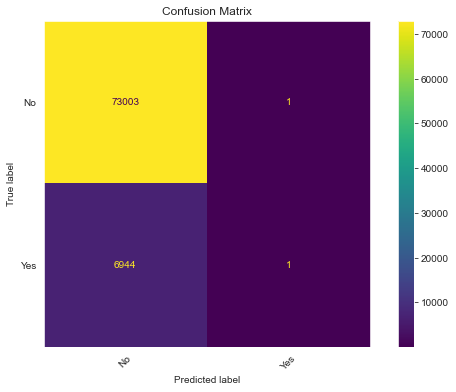

In [115]:
# confusion matrix
from sklearn import metrics
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Confusion Matrix')

disp = metrics.plot_confusion_matrix(model, data_test, target_test, ax = ax, xticks_rotation=45)
disp.confusion_matrix

fix to above equation

p(Heart Disease) = exp(b0 + b1(BMI) + b2(Smoking) + b3(MentalHealth) + b4(Physical Activity)) / 1 + exp(b0 + b1(BMI) + b2(Smoking) + b3(Mentalhealth) + b4(PhysicalActivity))

### [Feature Selection/Feature Engineering]


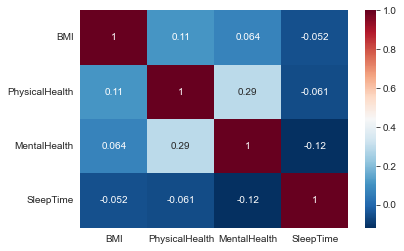

In [125]:
# to reduce multicolineartity
# we can check for highly-correlated
# features to remove
corr_matrix = heart_df.corr(method='pearson') 
 
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r')
plt.show()

In [128]:
# remove sleep time
# mental health
# Loop over bottom diagonal of correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):
 
        # Print variables with high correlation
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            print(corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])

In [ ]:
#choose features
#to use for modeling



There are no highly correlated attributes. We can conclude to manually remove features in the dataset.

### [Preprocessing for Modeling]

### [Final Models]